In [14]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

# For model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [15]:
df = pd.read_csv('/home/user/Desktop/project/data/archive(1)/heart_attack_youth_adult_france.csv')
df.head()

,Patient_ID,Age,Sex,Weight_kg,Height_cm,BMI,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Smoking_Status,...,Exercise_Induced_Pain,Heart_Attack,Age_Group,Region,Air_Pollution_Level,Income_Level,Education_Level,Health_Insurance,Regular_Checkups,Medication_Adherence
0,1,56,Male,118.4,184,35.4,96,94,204.3,Ex-Smoker,...,No,No,Adult,Central,67,Medium,College,Yes,Occasionally,Yes
1,2,46,Male,50.7,164,32.6,114,65,279.4,Non-Smoker,...,No,Yes,Adult,North,16,Low,High School,Yes,Occasionally,Yes
2,3,32,Male,118.0,179,39.8,98,118,291.4,Current Smoker,...,No,No,Adult,South,32,Medium,College,Yes,Frequently,Yes
3,4,60,Male,96.8,161,23.7,108,101,273.3,Non-Smoker,...,No,No,Youth,East,86,Low,College,Yes,Occasionally,Yes
4,5,25,Male,53.9,169,24.4,141,73,290.8,Ex-Smoker,...,No,No,Youth,South,15,Low,High School,Yes,Occasionally,No


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266786 entries, 0 to 266785
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Patient_ID                266786 non-null  int64  
 1   Age                       266786 non-null  int64  
 2   Sex                       266786 non-null  object 
 3   Weight_kg                 266786 non-null  float64
 4   Height_cm                 266786 non-null  int64  
 5   BMI                       266786 non-null  float64
 6   Blood_Pressure_Systolic   266786 non-null  int64  
 7   Blood_Pressure_Diastolic  266786 non-null  int64  
 8   Cholesterol_Level         266786 non-null  float64
 9   Smoking_Status            266786 non-null  object 
 10  Alcohol_Consumption       266786 non-null  int64  
 11  Physical_Activity_Hours   266786 non-null  float64
 12  Diabetes                  266786 non-null  object 
 13  Family_History            266786 non-null  o

In [17]:
df.drop('Patient_ID', axis=1, inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,266786.0,39.012842,12.399825,18.0,28.0,39.0,50.0,60.0
Weight_kg,266786.0,85.030971,20.185945,50.0,67.6,85.0,102.5,120.0
Height_cm,266786.0,174.469504,14.448139,150.0,162.0,174.0,187.0,199.0
BMI,266786.0,29.239231,6.199761,18.5,23.9,29.2,34.6,40.0
Blood_Pressure_Systolic,266786.0,134.528686,25.980116,90.0,112.0,134.0,157.0,179.0
Blood_Pressure_Diastolic,266786.0,89.458386,17.326668,60.0,74.0,89.0,104.0,119.0
Cholesterol_Level,266786.0,224.816570,43.292459,150.0,187.2,224.8,262.2,300.0
Alcohol_Consumption,266786.0,9.498085,5.768155,0.0,4.0,9.0,15.0,19.0
Physical_Activity_Hours,266786.0,7.497130,4.334888,0.0,3.7,7.5,11.3,15.0
Stress_Level,266786.0,5.491105,2.870952,1.0,3.0,5.0,8.0,10.0


In [18]:
df.describe(include='object').T

,count,unique,top,freq
Sex,266786,3,Female,128065
Smoking_Status,266786,3,Non-Smoker,133491
Diabetes,266786,2,No,226827
Family_History,266786,2,No,160078
Diet_Type,266786,3,Healthy,106507
Exercise_Induced_Pain,266786,2,No,240243
Heart_Attack,266786,2,No,213313
Age_Group,266786,2,Adult,154970
Region,266786,5,North,53529
Income_Level,266786,3,Medium,106790


In [19]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Age                         0.0
Sex                         0.0
Weight_kg                   0.0
Height_cm                   0.0
BMI                         0.0
Blood_Pressure_Systolic     0.0
Blood_Pressure_Diastolic    0.0
Cholesterol_Level           0.0
Smoking_Status              0.0
Alcohol_Consumption         0.0
Physical_Activity_Hours     0.0
Diabetes                    0.0
Family_History              0.0
Diet_Type                   0.0
Stress_Level                0.0
Heart_Rate                  0.0
Exercise_Induced_Pain       0.0
Heart_Attack                0.0
Age_Group                   0.0
Region                      0.0
Air_Pollution_Level         0.0
Income_Level                0.0
Education_Level             0.0
Health_Insurance            0.0
Regular_Checkups            0.0
Medication_Adherence        0.0
dtype: float64

Duplicate Rows (%):
0.0


In [20]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)
outliers

,Age,Sex,Weight_kg,Height_cm,BMI,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Smoking_Status,Alcohol_Consumption,...,Exercise_Induced_Pain,Heart_Attack,Age_Group,Region,Air_Pollution_Level,Income_Level,Education_Level,Health_Insurance,Regular_Checkups,Medication_Adherence


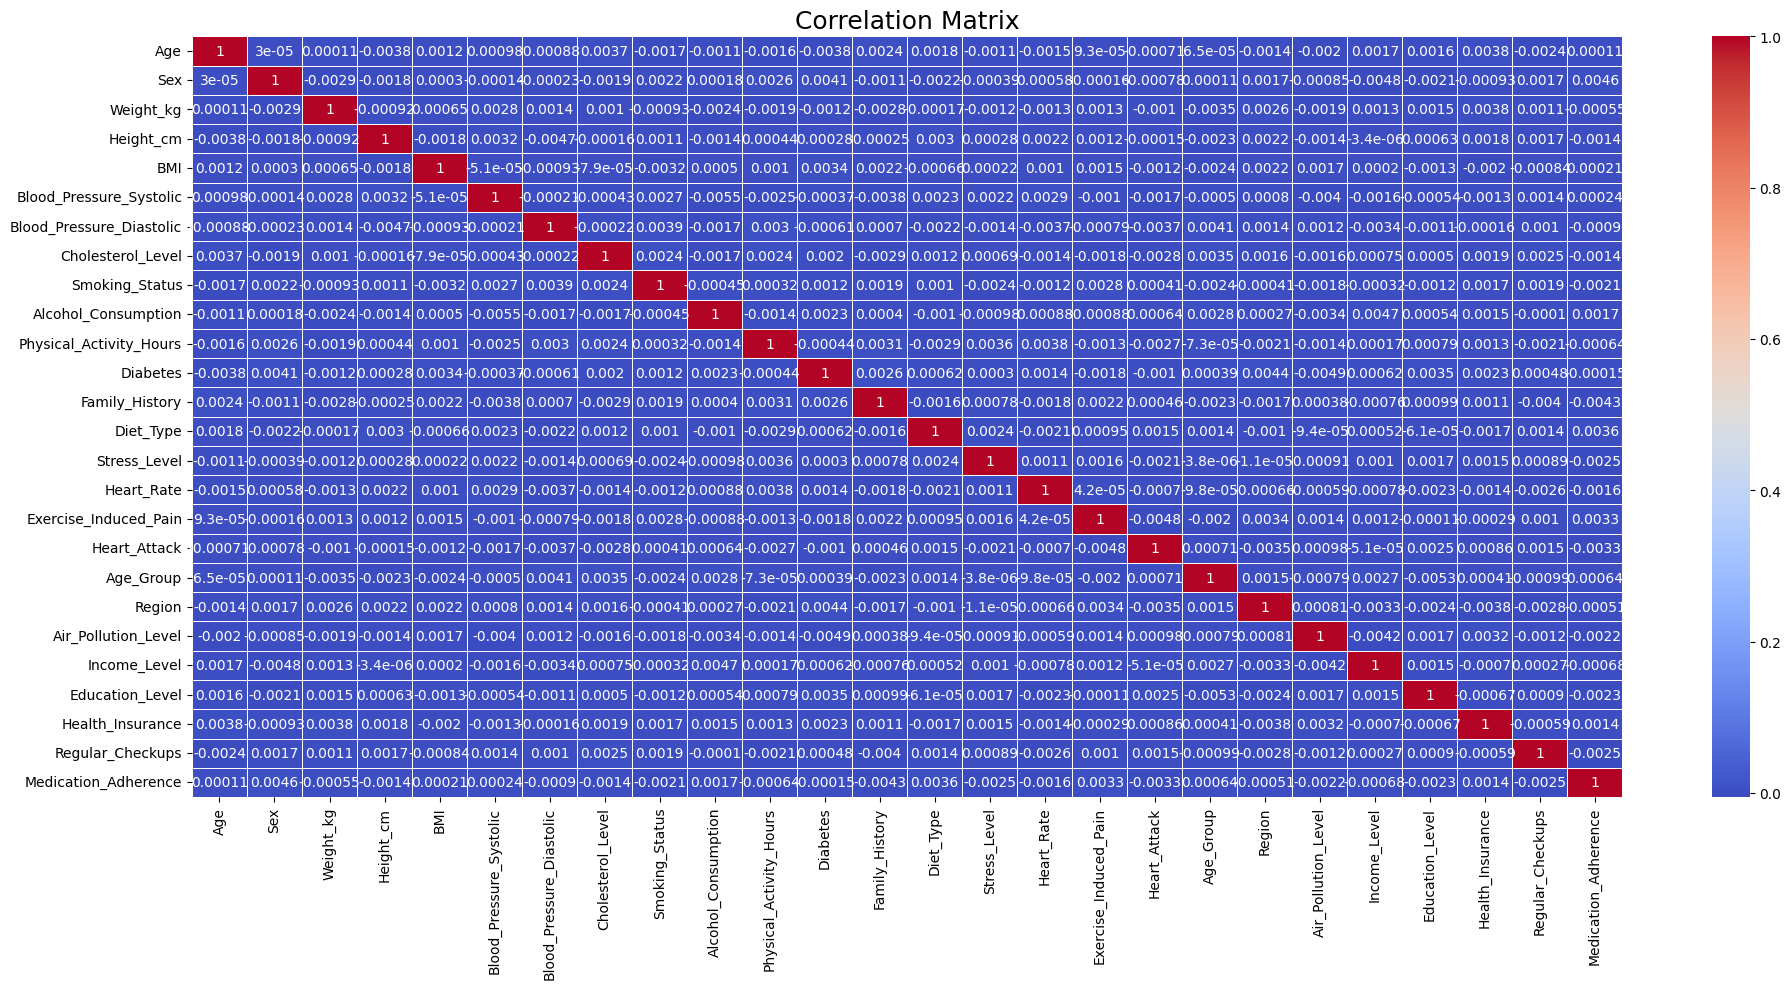

In [21]:
label_encoders = {}
categorical_features = ["Sex", "Smoking_Status", "Diabetes", "Family_History", "Diet_Type", 
                        "Exercise_Induced_Pain", "Heart_Attack", "Age_Group", "Region", 
                        "Income_Level", "Education_Level", "Health_Insurance", "Regular_Checkups", 
                        "Medication_Adherence"]

for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

correlation_matrix = df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=18)
plt.tight_layout()
plt.show()

In [9]:
X = df.drop('Heart_Attack', axis=1)
y = df['Heart_Attack']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
 #   "SVM": SVC(kernel='rbf', C=1.0, probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
#    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
#    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return accuracy, precision, recall, f1

results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.799636,0.639418,0.799636,0.710608
1,KNN,0.738671,0.681225,0.738671,0.704577
2,Decision Tree,0.662487,0.678579,0.662487,0.670185
3,XGBoost,0.798999,0.674075,0.798999,0.710613



Best Model:
Model        Logistic Regression
Accuracy                0.799636
Precision               0.639418
Recall                  0.799636
F1-Score                0.710608
Name: 0, dtype: object


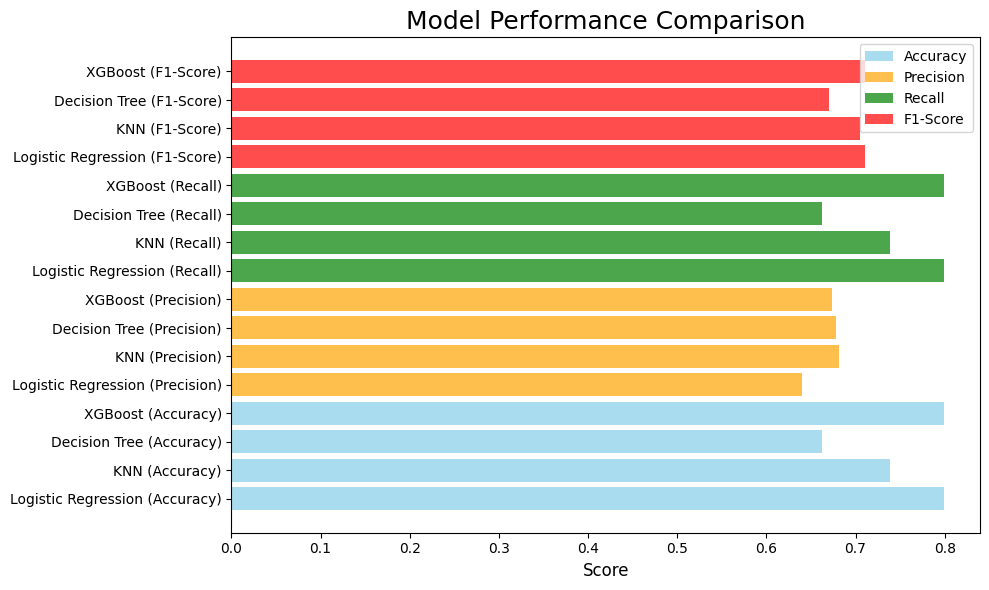


Optimal Model based on Accuracy: Logistic Regression with Accuracy = 0.7996


In [10]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model:")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")

In [11]:
pip install bandit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
def validate_inputs(X):
    if not isinstance(X, pd.DataFrame):
        raise ValueError("Expected input type is pandas DataFrame.")
    if X.isnull().sum().sum() > 0:
        raise ValueError("Input contains missing values.")
    if not all(col in X.columns for col in X.columns):
        raise ValueError("Input DataFrame does not contain the necessary columns.")

def safe_fit(model, X_train, y_train, max_mem=100000000):  # 100MB as an example
    if X_train.nbytes > max_mem:
        raise MemoryError("Input data exceeds memory limits.")
    model.fit(X_train, y_train)

# Проверка входных данных перед обучением
validate_inputs(X_train)
safe_fit(model, X_train_scaled, y_train)

In [13]:
from joblib import dump, load

# Сохранение модели
dump(model, '/home/user/Desktop/project/models/heart_attack_model.joblib')
print("Модель сохранена как 'heart_attack_model.joblib'.")

# Загрузка модели
loaded_model = load('/home/user/Desktop/project/models/heart_attack_model.joblib')
print("Модель загружена.")

Модель сохранена как 'heart_attack_model.joblib'.
Модель загружена.


In [1]:
import pytest
import pandas as pd

@pytest.fixture
def sample_data():
    # Пример тестового набора данных
    data = {
        'Patient_ID': [1, 2, 3],
        'Age': [25, 30, 35],
        'Cholesterol': [200, 210, 190]
    }
    return pd.DataFrame(data)

def test_drop_patient_id(sample_data):
    sample_data.drop('Patient_ID', axis=1, inplace=True)
    assert 'Patient_ID' not in sample_data.columns

def test_no_missing_values(sample_data):
    assert sample_data.isnull().sum().sum() == 0

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def test_data_loading():
    df = pd.read_csv('/home/user/Desktop/project/data/archive(1)/heart_attack_youth_adult_france.csv')
    assert not df.empty, "Данные не загружены или пустые."
    required_columns = ['Patient_ID', 'Heart_Attack']
    for col in required_columns:
        assert col in df.columns, f"Отсутствует столбец: {col}"
    print("Тест загрузки данных успешно пройден.")

def test_data_preprocessing():
    df = pd.read_csv('/home/user/Desktop/project/data/archive(1)/heart_attack_youth_adult_france.csv')
    df.drop('Patient_ID', axis=1, inplace=True)
    
    assert 'Patient_ID' not in df.columns, "Столбец Patient_ID не удалён."
    assert df.isnull().sum().sum() == 0, "В данных есть пропущенные значения."
    print("Тест предобработки данных успешно пройден.")

def test_data_splitting():
    df = pd.read_csv('/home/user/Desktop/project/data/archive(1)/heart_attack_youth_adult_france.csv')
    df.drop('Patient_ID', axis=1, inplace=True)
    X = df.drop('Heart_Attack', axis=1)
    y = df['Heart_Attack']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    assert len(X_train) > 0 and len(X_test) > 0, "Данные не разделены."
    assert len(X_train) == len(y_train), "Несоответствие между X_train и y_train."
    print("Тест разделения данных успешно пройден.")

def test_model_training():
    df = pd.read_csv('/home/user/Desktop/project/data/archive(1)/heart_attack_youth_adult_france.csv')
    df.drop('Patient_ID', axis=1, inplace=True)
    X = df.drop('Heart_Attack', axis=1)
    y = df['Heart_Attack']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    assert accuracy > 0.5, f"Точность модели слишком низкая: {accuracy}"
    print(f"Тестирование модели прошло успешно. Точность: {accuracy:.2f}")

if __name__ == "__main__":
    test_data_loading()
    test_data_preprocessing()
    test_data_splitting()
    test_model_training()

Тест загрузки данных успешно пройден.
Тест предобработки данных успешно пройден.
Тест разделения данных успешно пройден.


ValueError: could not convert string to float: 'Female'

In [24]:
# -*- coding: utf-8 -*-
"""Heart Attack Prediction: Testing and Model Implementation"""

# Импорт библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Функция тестирования загрузки данных
def test_data_loading():
    df = pd.read_csv('/home/user/Desktop/project/data/archive(1)/heart_attack_youth_adult_france.csv')
    assert not df.empty, "Данные не загружены или пустые."
    required_columns = ['Patient_ID', 'Heart_Attack']
    for col in required_columns:
        assert col in df.columns, f"Отсутствует столбец: {col}"
    print("Тест загрузки данных успешно пройден.")

# Функция предобработки данных
def preprocess_data():
    df = pd.read_csv('/home/user/Desktop/project/data/archive(1)/heart_attack_youth_adult_france.csv')
    df.drop('Patient_ID', axis=1, inplace=True)

    # Обрабатываем категориальные данные
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = LabelEncoder().fit_transform(df[column])

    assert df.isnull().sum().sum() == 0, "В данных есть пропущенные значения."
    return df

# Функция тестирования разделения данных
def test_data_splitting(df):
    X = df.drop('Heart_Attack', axis=1)
    y = df['Heart_Attack']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    assert len(X_train) > 0 and len(X_test) > 0, "Данные не разделены."
    assert len(X_train) == len(y_train), "Несоответствие между X_train и y_train."
    print("Тест разделения данных успешно пройден.")
    return X_train, X_test, y_train, y_test

# Функция тестирования модели
def test_model_training(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    assert accuracy > 0.5, f"Точность модели слишком низкая: {accuracy}"
    print(f"Тестирование модели прошло успешно. Точность: {accuracy:.2f}")

# Запуск всех тестов
if __name__ == "__main__":
    test_data_loading()
    df = preprocess_data()
    X_train, X_test, y_train, y_test = test_data_splitting(df)
    test_model_training(X_train, X_test, y_train, y_test)

Тест загрузки данных успешно пройден.
Тест разделения данных успешно пройден.
Тестирование модели прошло успешно. Точность: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# -*- coding: utf-8 -*-
"""Heart Attack Prediction: Testing and Model Implementation"""

# Импорт библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pytest

# Глобальный путь к данным
DATA_PATH = '/home/user/Desktop/project/data/archive(1)/heart_attack_youth_adult_france.csv'

# Функция для загрузки данных
def load_data():
    df = pd.read_csv(DATA_PATH)
    return df

# Функция для предобработки данных
def preprocess_data(df):
    df.drop('Patient_ID', axis=1, inplace=True)
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = LabelEncoder().fit_transform(df[column])
    return df

# Функция для разделения данных
def split_data(df):
    X = df.drop('Heart_Attack', axis=1)
    y = df['Heart_Attack']
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Функция для обучения модели
def train_model(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Тест загрузки данных
def test_data_loading():
    df = load_data()
    assert not df.empty, "Данные не загружены или пустые."
    required_columns = ['Patient_ID', 'Heart_Attack']
    for col in required_columns:
        assert col in df.columns, f"Отсутствует столбец: {col}"

# Тест предобработки данных
def test_data_preprocessing():
    df = load_data()
    df = preprocess_data(df)
    assert 'Patient_ID' not in df.columns, "Столбец Patient_ID не удален."
    assert df.isnull().sum().sum() == 0, "В данных есть пропущенные значения."

# Тест разделения данных
def test_data_splitting():
    df = load_data()
    df = preprocess_data(df)
    X_train, X_test, y_train, y_test = split_data(df)
    assert len(X_train) > 0 and len(X_test) > 0, "Данные не разделены."
    assert len(X_train) == len(y_train), "Несоответствие между X_train и y_train."

# Тест обучения модели
def test_model_training():
    df = load_data()
    df = preprocess_data(df)
    X_train, X_test, y_train, y_test = split_data(df)
    accuracy = train_model(X_train, X_test, y_train, y_test)
    assert accuracy > 0.5, f"Точность модели слишком низкая: {accuracy}"